Descriptive Analysis of Animal Speeds dataset

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
asp=pd.read_csv("animal_speeds.csv",sep=";")

In [ ]:
asp

In [ ]:
asp.describe()

Inter Quartile Range (IQR) : 75% quartile - 25% quartile

In [41]:
weight_IQR=asp["weight"].quantile(0.75) - asp["weight"].quantile(0.25)
speed_IQR=asp["highspeed"].quantile(0.75) - asp["highspeed"].quantile(0.25)

Variance

In [42]:
asp.var()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


weight       1.509289e+08
highspeed    1.187509e+03
dtype: float64

In [ ]:
asp.mean()

In [ ]:
asp.median()

In [ ]:
asp.groupby(['movement_type']).count()

In [ ]:
asp.groupby(['movement_type']).mean()

Range : Maximum - Minimum

In [38]:
#For weight
weight_range=max(asp['weight'])-min(asp['weight'])
weight_range

139999.999

In [39]:
#For high speed
speed_range=max(asp['highspeed'])-min(asp['highspeed'])
speed_range

193.5

In [ ]:
asp.isnull().sum()

In [ ]:
plt.scatter(asp['highspeed'],asp['weight'])
plt.ylabel('Average Weight')
plt.xlabel('High Speed')
plt.title('Plot between Avg Weight and High Speed')

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


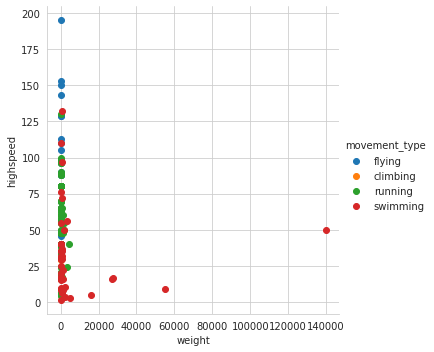

In [36]:
sns.set_style("whitegrid")
sns.FacetGrid(asp, hue="movement_type", size=5) \
   .map(plt.scatter, "weight", "highspeed") \
   .add_legend()
plt.show()

In [ ]:
sns.FacetGrid(asp,hue='weight',size=5).map(sns.distplot,'highspeed').add_legend()

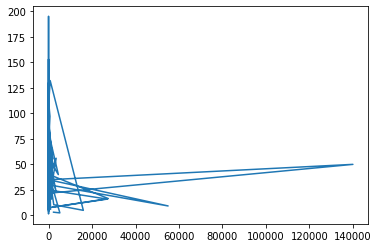

In [28]:
x=asp['weight']
y=asp['highspeed']
plt.plot(x,y)

Linear Regression between Weight and High Speed

In [43]:
# collecting X and Y
x=asp['weight'].values
y=asp['highspeed'].values


In [46]:
mean_x=np.mean(x)
mean_y=np.mean(y)

n=len(x)

SS_xy = np.sum(y*x) - n*mean_y*mean_x
SS_xx = np.sum(x*x) - n*mean_x*mean_x

b1 = SS_xy / SS_xx
b0 = mean_y - b1*mean_x
print(b1,b0)

-0.00026305390035944614 53.165440486441696


High Speed = -0.00026 * (Weight) + 53.1654, Negative slope implies inverse relationship



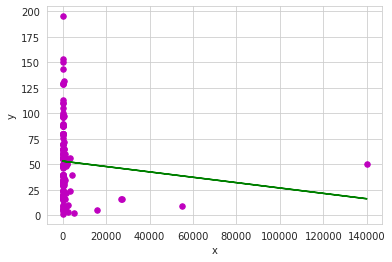

In [48]:
    plt.scatter(x, y, color = "m",
               marker = "o", s = 30)
  
    # predicted response vector
    y_pred = b0 + b1*x
  
    # plotting the regression line
    plt.plot(x, y_pred, color = "g")
  
    # putting labels
    plt.xlabel('x')
    plt.ylabel('y')
  
    # function to show plot
    plt.show()

In [49]:
ss_t = np.sum((y-mean_y)*(y-mean_y))
ss_r = np.sum((y-y_pred)*(y-y_pred))
r2=1-(ss_r/ss_t)
r2

0.008794775433880964